In [7]:
def somaEntrada():
  quantidadeDeEntrada = 3
  sinaisDeEntrada = [4,5,6]
  pesos = [7,15,6]
  somaTotal = 0
  índice = 0

  for sinal in sinaisDeEntrada:
    somaTotal = somaTotal + (sinal*pesos[índice])
    índice = índice + 1

  return somaTotal

  somaEntrada()


In [11]:
# Importando frameworks
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [23]:
feature_vector_length = 784
num_classes = 10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)
print("Quantidade de elementos de teino: {}".format(len(X_train)))
print("Quantidade de elementos de teino: {}".format(len(X_test)))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = to_categorical (Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
input_shape = (feature_vector_length,)
print(f'Forma do recurso: {input_shape}')

Quantidade de elementos de teino: 60000
Quantidade de elementos de teino: 10000
Forma do recurso: (784,)


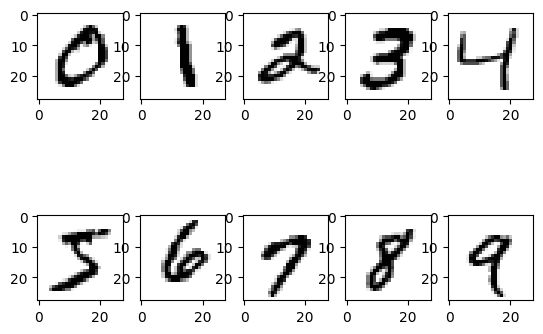

In [25]:
fig, ax = plt.subplots(2,5)
ax[0,0].imshow(X_train [1].reshape (28,28), cmap=plt.cm.binary)
ax[0,1].imshow(X_train [6].reshape (28,28), cmap=plt.cm.binary)
ax[0,2].imshow(X_train [5].reshape (28,28), cmap=plt.cm.binary)
ax[0,3].imshow(X_train [7].reshape(28,28), cmap=plt.cm.binary)
ax[0,4].imshow(X_train [2].reshape(28,28), cmap=plt.cm.binary)
ax[1,0].imshow(X_train[0].reshape (28,28), cmap=plt.cm.binary)
ax[1,1].imshow(X_train[13].reshape (28,28), cmap=plt.cm.binary)
ax[1,2].imshow(X_train[15].reshape (28,28), cmap=plt.cm.binary)
ax[1,3].imshow(X_train[17].reshape(28,28), cmap=plt.cm.binary)
ax[1,4].imshow(X_train[4].reshape (28,28), cmap=plt.cm.binary)
plt.show()

In [27]:
modelo = Sequential()
modelo.add(Dense(350, input_shape=input_shape, activation='relu'))
modelo.add(Dense(50, activation= 'relu'))
modelo.add(Dense(num_classes, activation='softmax'))
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 350)               274750    
                                                                 
 dense_2 (Dense)             (None, 50)                17550     
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 292810 (1.12 MB)
Trainable params: 292810 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
modelo.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [29]:
historico = modelo.fit(X_train, Y_train, epochs=20, batch_size=100, validation_split=0.2)

Epoch 1/20
480/480 [==============================] - 6s 11ms/step - loss: 0.0128 - accuracy: 0.9184 - val_loss: 0.0067 - val_accuracy: 0.9573
Epoch 2/20
480/480 [==============================] - 4s 9ms/step - loss: 0.0057 - accuracy: 0.9640 - val_loss: 0.0058 - val_accuracy: 0.9626
Epoch 3/20
480/480 [==============================] - 4s 9ms/step - loss: 0.0040 - accuracy: 0.9749 - val_loss: 0.0049 - val_accuracy: 0.9668
Epoch 4/20
480/480 [==============================] - 5s 11ms/step - loss: 0.0031 - accuracy: 0.9808 - val_loss: 0.0040 - val_accuracy: 0.9740
Epoch 5/20
480/480 [==============================] - 4s 9ms/step - loss: 0.0024 - accuracy: 0.9857 - val_loss: 0.0040 - val_accuracy: 0.9740
Epoch 6/20
480/480 [==============================] - 4s 9ms/step - loss: 0.0021 - accuracy: 0.9874 - val_loss: 0.0039 - val_accuracy: 0.9744
Epoch 7/20
480/480 [==============================] - 5s 11ms/step - loss: 0.0017 - accuracy: 0.9895 - val_loss: 0.0036 - val_accuracy: 0.9771
Epo

In [32]:
teste_resultados = modelo.evaluate(X_test, Y_test, verbose=1)
print(f'Resultado nos testes - Erro: {teste_resultados[0]} - Acuracia: {teste_resultados[1]}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0032 - accuracy: 0.9802
Resultado nos testes - Erro: 0.00319645251147449 - Acuracia: 0.9801999926567078%


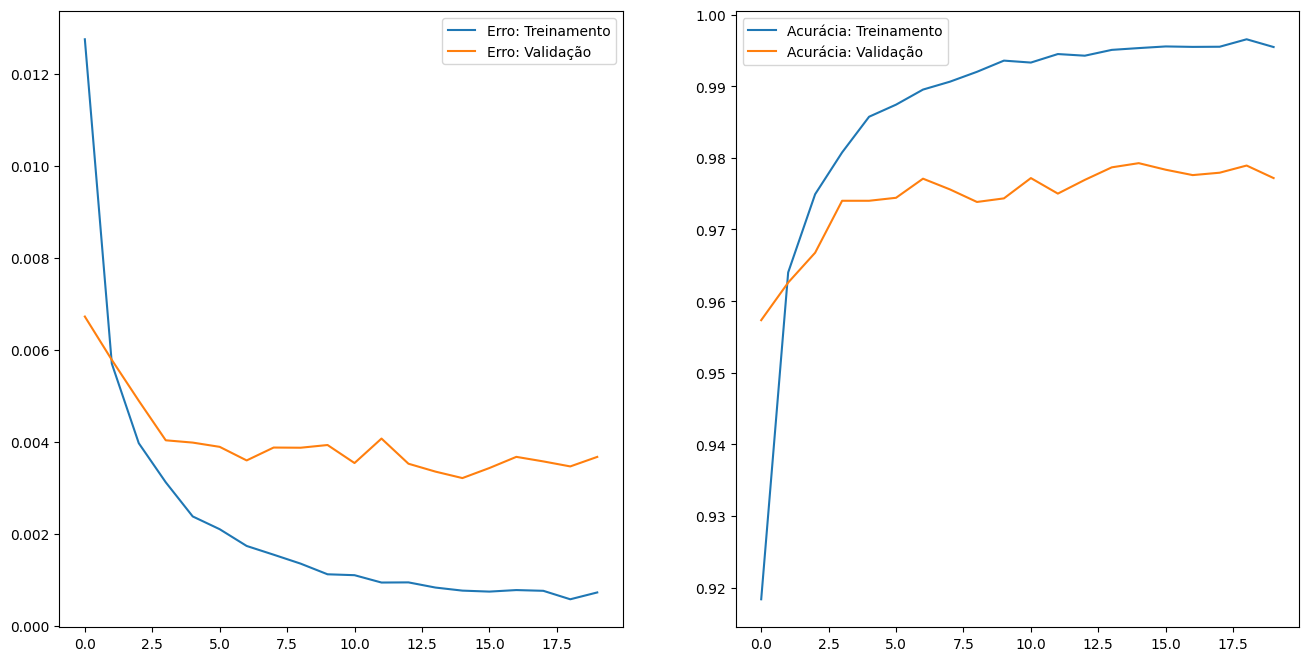

In [35]:
fig,ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(historico.history['loss'], label = "Erro: Treinamento")
ax[0].plot(historico.history['val_loss'],label = "Erro: Validação", axes =ax[0])
legend = ax[0].legend(loc='best')
ax[1].plot(historico.history['accuracy'], label="Acurácia: Treinamento")
ax[1].plot(historico.history['val_accuracy'], label="Acurácia: Validação")
legend = ax[1].legend(loc='best')
plt.show()